# 챕터 10 실습 코드들 

챕터 10의 실습에 필요한 코드 예제를 구글 코랩에서 여시려면 [링크](https://colab.research.google.com/drive/1520ZAw6WmqgBo4bpb0k3qJRc5tKi_NFP?usp=sharing
)를 클릭하시거나 아래의 주소를 웹브라우저에 복사해 주세요. 

실습 코드 링크: hhttps://colab.research.google.com/drive/1520ZAw6WmqgBo4bpb0k3qJRc5tKi_NFP?usp=sharing

## 10.4.	데이터 전처리  

### [코드 예제 10.4.2-1: 실습에 필요한 모듈 불러오기] 

In [ ]:
# 필요한 모듈 불러오기 
import pandas as pd

# 데이터셋 불러오기 
df = pd.read_csv("https://raw.githubusercontent.com/skku-ai-textbook/aitextbook/main/data/CH09-data.csv", sep="\t", index_col=None)

print("데이터 셋은 총 {}개의 행과 {}개의 열로 이루어져있습니다".format(*df.shape))


데이터 셋은 총 982개의 행과 8개의 열로 이루어져있습니다


### [코드 예제 10.4.2.1-1: 데이터의 결측값 여부 파악] 

In [ ]:
df.isnull()

,audicnt,scrncnt,showcnt,avgrels,maxshare,maxsharesd,audi_show,audi_scrn
0,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False
2,True,False,False,True,False,True,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
977,False,False,True,False,False,False,False,False
978,False,False,False,False,False,False,False,True
979,True,False,False,False,False,False,False,False
980,False,False,False,False,False,False,True,False


## [코드 예제 10.4.2.1-2: 각 변수 별 결측값 파악하기] 

In [ ]:
df.isnull().sum(axis=0)

audicnt       103
scrncnt        95
showcnt        95
avgrels        97
maxshare      112
maxsharesd    113
audi_show      85
audi_scrn      98
dtype: int64

### [코드 예제 10.4.2.1-3: 행을 기준으로 결측값 파악하기]

In [ ]:
# 각 행별 결측값 개수를 구하기 
df['missing'] = df.isnull().sum(axis=1)
# 첫 다섯 행 출력 
df.head(5)

,audicnt,scrncnt,showcnt,avgrels,maxshare,maxsharesd,audi_show,audi_scrn,missing
0,25385.74,5150.0,24524.0,14.3,44.8,14.356235,NaN,5069.0,1
1,20000.84,5102.0,23140.0,15.3,45.9,14.655629,20136.84,5072.0,0
2,NaN,4998.0,22674.0,NaN,44.8,NaN,6750.60,4880.0,3
3,7943.88,5014.0,23420.0,9.0,45.2,13.582996,8034.88,4995.0,0
4,2578.85,2542.0,11050.0,14.3,48.1,14.340928,2661.85,2572.0,0


### [코드 예제 10.4.2.1-4: 결측값이 두 개 이하인 데이터만 선택하기] 

In [ ]:
# 결측값이 두 개 이하인 행만 선택
df[df['missing']<=2].head()

,audicnt,scrncnt,showcnt,avgrels,maxshare,maxsharesd,audi_show,audi_scrn,missing
0,25385.74,5150.0,24524.0,14.3,44.8,14.356235,NaN,5069.0,1
1,20000.84,5102.0,23140.0,15.3,45.9,14.655629,20136.84,5072.0,0
3,7943.88,5014.0,23420.0,9.0,45.2,13.582996,8034.88,4995.0,0
4,2578.85,2542.0,11050.0,14.3,48.1,14.340928,2661.85,2572.0,0
5,2478.01,2224.0,9979.0,16.3,NaN,15.475676,2598.01,2205.0,1


### [코드 예제 10.4.2.2-1: .dropna()를 사용해 결측값 제거] 

In [ ]:
# 결측값이 하나라도 있는 행 삭제 
df.dropna().head()

,audicnt,scrncnt,showcnt,avgrels,maxshare,maxsharesd,audi_show,audi_scrn,missing
1,20000.84,5102.0,23140.0,15.3,45.9,14.655629,20136.84,5072.0,0
3,7943.88,5014.0,23420.0,9.0,45.2,13.582996,8034.88,4995.0,0
4,2578.85,2542.0,11050.0,14.3,48.1,14.340928,2661.85,2572.0,0
6,3301.92,2183.0,10768.0,12.8,36.0,11.539156,3387.92,2150.0,0
7,3281.59,2400.0,11304.0,17.2,39.4,13.991839,3328.59,2421.0,0


### [코드 예제 10.4.2.2-2: 특정 변수만을 선택해 결측값 제거] 

In [ ]:
# 특정 변수만을 선택해 제거 
df.dropna(subset=['scrncnt', 'showcnt', "maxshare"]).head()

,audicnt,scrncnt,showcnt,avgrels,maxshare,maxsharesd,audi_show,audi_scrn,missing
0,25385.74,5150.0,24524.0,14.3,44.8,14.356235,NaN,5069.0,1
1,20000.84,5102.0,23140.0,15.3,45.9,14.655629,20136.84,5072.0,0
2,NaN,4998.0,22674.0,NaN,44.8,NaN,6750.60,4880.0,3
3,7943.88,5014.0,23420.0,9.0,45.2,13.582996,8034.88,4995.0,0
4,2578.85,2542.0,11050.0,14.3,48.1,14.340928,2661.85,2572.0,0


### [코드 예제 10.4.2.3-1: .fillna()를 사용한 결측값 치환] 

In [ ]:
# 결측값을 0으로 치환
df.fillna(0).head()

,audicnt,scrncnt,showcnt,avgrels,maxshare,maxsharesd,audi_show,audi_scrn,missing
0,25385.74,5150.0,24524.0,14.3,44.8,14.356235,0.00,5069.0,1
1,20000.84,5102.0,23140.0,15.3,45.9,14.655629,20136.84,5072.0,0
2,0.00,4998.0,22674.0,0.0,44.8,0.000000,6750.60,4880.0,3
3,7943.88,5014.0,23420.0,9.0,45.2,13.582996,8034.88,4995.0,0
4,2578.85,2542.0,11050.0,14.3,48.1,14.340928,2661.85,2572.0,0


### [코드 예제 10.4.2.3-2: 특성마다 각기 다른 값으로 결측값 변경하기] 

In [ ]:
# 특성마다 각기 다른 값으로 변경
values = {'audicnt': df['audicnt'].mean(), 'scrncnt': df['scrncnt'].mean()}
df.fillna(value=values).head()

,audicnt,scrncnt,showcnt,avgrels,maxshare,maxsharesd,audi_show,audi_scrn,missing
0,25385.740000,5150.0,24524.0,14.3,44.8,14.356235,NaN,5069.0,1
1,20000.840000,5102.0,23140.0,15.3,45.9,14.655629,20136.84,5072.0,0
2,5120.512048,4998.0,22674.0,NaN,44.8,NaN,6750.60,4880.0,3
3,7943.880000,5014.0,23420.0,9.0,45.2,13.582996,8034.88,4995.0,0
4,2578.850000,2542.0,11050.0,14.3,48.1,14.340928,2661.85,2572.0,0


### [코드 예제 10.4.3-1: 실습에 필요한 데이터 만들기] 

In [ ]:
# 데이터 준비하기 
df = pd.read_csv("https://raw.githubusercontent.com/skku-ai-textbook/aitextbook/main/data/CH09-data.csv", sep="\t", index_col=None)
df = df.dropna() # 결측값을 제외함 
print("데이터 셋은 총 {}개의 데이터와 {}의 컬럼으로 이루어져 있습니다".format(*df.shape))

데이터 셋은 총 421개의 데이터와 8의 컬럼으로 이루어져 있습니다


### [코드 예제 10.4.3-2: 박스플롯을 사용해 이상치 감지] 

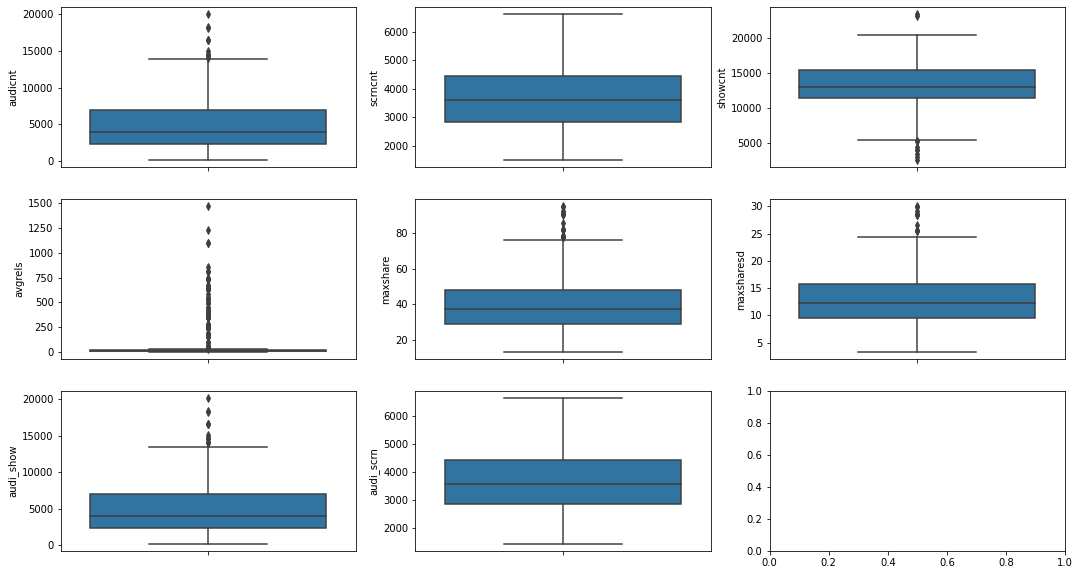

In [ ]:
# 시각화에 필요한 모듈 불러오기 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

# 캔버스 설정 
figure, axs = plt.subplots(nrows=3, ncols=3)  
figure.set_size_inches(18,10) 

# 데이터 내의 모든 변수 시각화 
for i, col in enumerate(df.columns): 
    sns.boxplot(data=df, y=col, ax=axs[i//3, i%3]) 

### [코드 예제 10.4.3-3: 박스플롯을 근거로 극단치값 계산] 

In [ ]:
# 25%, 75% 사분범위 계산 
iq1 = df['avgrels'].quantile(.25) 
iq2 = df['avgrels'].quantile(.75)
iqr = iq2-iq1 
# 극단치 판단 
out1 = iq1 - (1.5*iqr) 
out2 = iq2 + (1.5*iqr) 

# 출력
print("25% 위치에 있는 데이터: {:8.3f}, 75% 위치에 있는 데이터: {:8.3f}, IQR: {:8.3f}".format(iq1, iq2, iqr))
print("{:8.3f}보다 작거나, {:8.3f}보다 큰 데이터는 이상치로 판단됩니다".format(out1, out2))

25% 위치에 있는 데이터:   11.000, 75% 위치에 있는 데이터:   18.800, IQR:    7.800
  -0.700보다 작거나,   30.500보다 큰 데이터는 이상치로 판단됩니다


### [코드 예제 10.4.3-4: 극단치값 제거] 

In [ ]:
df = df[(df['avgrels']>=out1) & (df['avgrels']<=out2)]
print("데이터 셋은 총 {}개의 데이터와 {}의 컬럼으로 이루어져있습니다".format(*df.shape))

데이터 셋은 총 353개의 데이터와 8의 컬럼으로 이루어져있습니다


## 10.5.	데이터 정제 

### [코드 예제 10.5.1-1: 명목 변수로 만들기] 

In [ ]:
# 필요한 모듈 불러오기 
import numpy as np

# 명목변수로 변환 
df['binary_class'] = np.where(df['audicnt'] > df['audicnt'].mean(), 1, 0)
df.head()

,audicnt,scrncnt,showcnt,avgrels,maxshare,maxsharesd,audi_show,audi_scrn,binary_class
1,20000.84,5102.0,23140.0,15.3,45.9,14.655629,20136.84,5072.0,1
3,7943.88,5014.0,23420.0,9.0,45.2,13.582996,8034.88,4995.0,1
4,2578.85,2542.0,11050.0,14.3,48.1,14.340928,2661.85,2572.0,0
6,3301.92,2183.0,10768.0,12.8,36.0,11.539156,3387.92,2150.0,0
7,3281.59,2400.0,11304.0,17.2,39.4,13.991839,3328.59,2421.0,0


### [코드 예제 10.5.1-2: 명목이 여러 개인 변수 만들기] 

In [ ]:
# 명목이 세 개인 변수로 변환
df['multi_class'] = np.where(df['audicnt'] > df['audicnt'].quantile(.75), 3, 
                                np.where(df['audicnt'] >= df['audicnt'].mean(), 2, 
                                         np.where(df['audicnt'] >= df['audicnt'].quantile(.25), 1, 0)))
df.head()

,audicnt,scrncnt,showcnt,avgrels,maxshare,maxsharesd,audi_show,audi_scrn,binary_class,multi_class
1,20000.84,5102.0,23140.0,15.3,45.9,14.655629,20136.84,5072.0,1,3
3,7943.88,5014.0,23420.0,9.0,45.2,13.582996,8034.88,4995.0,1,3
4,2578.85,2542.0,11050.0,14.3,48.1,14.340928,2661.85,2572.0,0,1
6,3301.92,2183.0,10768.0,12.8,36.0,11.539156,3387.92,2150.0,0,1
7,3281.59,2400.0,11304.0,17.2,39.4,13.991839,3328.59,2421.0,0,1


### [코드 예제 10.5.1-3: 만들어진 변수 살펴보기] 

In [ ]:
# 명목을 두 개로 나눈 변수
print(df['binary_class'].value_counts())
# 네 개의 명목으로 나눈 변수
print(df['multi_class'].value_counts())

0    217
1    136
Name: binary_class, dtype: int64
1    129
3     88
0     88
2     48
Name: multi_class, dtype: int64


### [코드 예제 10.5.2-1: 실습에 필요한 데이터 불러오기]  

In [ ]:
#데이터 불러오기
df3 = pd.read_csv("https://raw.githubusercontent.com/skku-ai-textbook/aitextbook/main/data/CH09-data3.csv")
print("데이터 셋은 총 {}개의 행과 {}개의 열로 이루어져있습니다".format(*df3.shape))

데이터 셋은 총 5000개의 행과 10개의 열로 이루어져있습니다


### [코드 예제 10.5.2-2: 변수의 유목 개수 확인하기]

In [ ]:
# 데이터의 각 값 출력하기 
df3['newspaper'].value_counts()

1    2667
2    2333
Name: newspaper, dtype: int64

### [코드 예제 10.5..2-3: 변수 리코딩] 

In [ ]:
# 변수 리코딩 
df3['newspaper']=df3['newspaper'].replace({1:1, 2:0}) 
df3['newspaper'].value_counts()

1    2667
0    2333
Name: newspaper, dtype: int64

### [코드 예제 10.5.2-4: 데이터 명목 살펴보기] 

In [ ]:
# 데이터 값의 사례수 보기 
df3['smartphone'].value_counts()

1    4278
0     509
      204
2       9
Name: smartphone, dtype: int64

### [코드 예제 10.5.2-5: 데이터 리코딩] 

In [ ]:
# 데이터 변환
df3['smartphone'] = df3['smartphone'].replace({' ':0, '0':0, '1':1, '2':1})
df3['smartphone'].value_counts()

1    4287
0     713
Name: smartphone, dtype: int64

### [코드 예제 10.5.3-1: 실습에 필요한 데이터 불러오기] 

In [ ]:
raw = pd.read_csv("https://raw.githubusercontent.com/skku-ai-textbook/aitextbook/main/data/CH09-data2.csv")
print("데이터 셋은 총 {}개의 행과 {}개의 열로 이루어져 있습니다.".format(*raw.shape))


데이터 셋은 총 3926개의 행과 8개의 열로 이루어져 있습니다.


### [코드 예제 10.5.3-2: 날짜 데이터에서 연, 달, 요일 추출하기] 

In [ ]:
# 날짜 데이터를 시간 데이터로 변환 
raw['date'] = pd.to_datetime(raw['date']) 

raw["year"] = raw["date"].dt.year #연도 추출
raw['month'] = raw["date"].dt.month_name() #달 추출
raw["day"] = raw["date"].dt.day_name() #요일 추출

raw.head()

,date,audiCnt,scrnCnt,showCnt,avgRels,maxShare,rain,temp,year,month,day
0,2010-01-01,6492.235,12785,61400,13.3,44.9,0.0,-4.9,2010,January,Friday
1,2010-01-02,2538.574,5150,24524,14.3,44.8,0.8,-0.1,2010,January,Saturday
2,2010-01-03,2000.084,5102,23140,15.3,45.9,0.0,-2.9,2010,January,Sunday
3,2010-01-04,668.868,4810,21522,12.0,53.4,5.9,-1.8,2010,January,Monday
4,2010-01-05,650.058,4768,21196,16.0,51.3,0.7,-5.2,2010,January,Tuesday


### [코드 예제 10.5.3-3: 원-핫-인코딩] 

In [ ]:
pd.get_dummies(raw['month']).head()

,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


### [코드 예제 10.5.3-4 : 기존 데이터와 합치기] 

In [ ]:
# 기존 데이터셋과의 병합 
raw = raw.merge(pd.get_dummies(raw['month']), left_index=True, right_index=True)
print(raw)

           date   audiCnt  scrnCnt  showCnt  ...  May  November  October  September
0    2010-01-01  6492.235    12785    61400  ...    0         0        0          0
1    2010-01-02  2538.574     5150    24524  ...    0         0        0          0
2    2010-01-03  2000.084     5102    23140  ...    0         0        0          0
3    2010-01-04   668.868     4810    21522  ...    0         0        0          0
4    2010-01-05   650.058     4768    21196  ...    0         0        0          0
...         ...       ...      ...      ...  ...  ...       ...      ...        ...
3921 2020-09-26   158.368     4559    13619  ...    0         0        0          1
3922 2020-09-27   144.412     4548    13420  ...    0         0        0          1
3923 2020-09-28    61.716     4070    10768  ...    0         0        0          1
3924 2020-09-29   242.082     4636    14686  ...    0         0        0          1
3925 2020-09-30   318.894     5183    16480  ...    0         0        0    